# Covid data batch analysis

study the results of the models and figure out which track(s) to follow

Author: Alex Palermo
last edit: 6-5-2021

In [133]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
bins_dict = {
  1: [(0, 7), (8, 999)],
  2: [(0, 14), (15, 999)],
  3: [(0, 21), (22, 999)],
  4: [(0, 28), (29, 999)],
  5: [(0, 35), (36, 999)],
  6: [(0, 7), (8, 14), (15, 999)],
  7: [(0, 7), (8, 21), (22, 999)],
  8: [(0, 7), (8, 35), (36, 999)],
  9: [(0, 14), (15, 21), (22, 999)],
  10: [(0, 14), (15, 35), (36, 999)],
  11: [(0, 21), (22, 35), (35, 999)],
  12: [(0, 3), (4, 999)],
  13: [(0, 3), (4, 7), (8, 999)],
  14: [(0, 3), (4, 14), (15, 999)],
  15: [(0, 3), (4, 14), (15, 35), (36, 999)],
  16: [(0, 7), (8, 14), (15, 21), (22, 28), (29, 999)]
}

In [134]:
results = dict()
batches = ["batch_525.json", "batch_524.json"]
for batch in batches:
  with open("results/" + batch, "r") as f:
    results.update(json.load(f))

Loop through bins and visualize results

In [135]:
for key in results.keys():
  print(key)
  data = results[key]
  bins = data['bins']
  models = list(data.keys())
  for model in models: 
    scores = data[model]['scores']
    print(scores)
    break
  break

12
{'Explained_var': [0.1081357363118689, 0.08144785664611731, 0.08541442175170244, 0.09490328897701306, 0.0809732306619877, 0.06821487687955852, 0.10660789021678796, 0.07193298823139094, 0.06584583959049062, 0.08621677933777594], 'MSE': [1739.7922260522294, 2557.4959632858568, 2178.40405189432, 2053.6922568586197, 2636.198702046906, 3575.448376429124, 1878.9439043927712, 2557.2345333066464, 2986.53965413691, 2525.5027199435826], 'R^2': [0.10803439856711783, 0.08140442731154729, 0.08507344776599968, 0.09487717022744424, 0.08082712935599723, 0.0681574469813846, 0.10628349436988316, 0.07189794147131623, 0.06584018385161028, 0.08601669739140905]}


In [136]:
scores = results['1']['DecisionTree']['scores']
for score in scores: 
  MSE = results['1']['DecisionTree']['scores']['MSE']
  avg = np.mean(MSE)
  std = np.std(MSE)


In [137]:
bins = []
models = []
scores = []

for key in results.keys():
  bins.append(key)
for model in results['1']:
  models.append(model)
for score in results['1']['Lasso']['scores']:
  scores.append(score)

models = models[:-1]
models = np.array(models)
models = np.delete(models, np.argwhere(models=="OLS"))

Make a giant pandas MultiIndexed dataframe with all the data<br>
row level 1: bins<br>
row level 2: models<br>
column level 1: score<br>
column level 2: avg, std<br>

In [146]:
models

array(['ARDRegression', 'Bayesian Ridge', 'DecisionTree', 'ElasticNet',
       'Lasso', 'RandomForest (n=10)', 'RandomForest (n=20)',
       'RandomForest (n=3)', 'Ridge'], dtype='<U19')

In [138]:
index = pd.MultiIndex.from_product([bins, models], names = ['bin id', 'models'])
columns = pd.MultiIndex.from_product([scores, ['avg', 'std']], names = ['metric', 'score'])
df = pd.DataFrame(index=index, columns=columns)

In [139]:
for bin_id in results:
  for model in models:
    for score in scores:
      avg = np.mean(results[bin_id][model]['scores'][score])
      std = np.std(results[bin_id][model]['scores'][score])
      
      df.loc[(bin_id, model), (score, 'avg')] = avg
      df.loc[(bin_id, model), (score, 'std')] = std

In [140]:
df

metric                     Explained_var                    MSE              \
score                                avg       std          avg         std   
bin id models                                                                 
12     ARDRegression            0.084969  0.013965  2468.925239  517.269444   
       Bayesian Ridge           0.084728   0.01319  2480.827506  471.186115   
       DecisionTree             0.129144  0.020076  2362.793384  445.471544   
       ElasticNet               0.061724  0.009748  2539.800471   492.98789   
       Lasso                     0.06851  0.011426  2524.310869   601.82257   
...                                  ...       ...          ...         ...   
11     Lasso                    0.089449  0.016782  2472.858882  669.817853   
       RandomForest (n=10)      0.166641  0.021217  2259.146578  459.674111   
       RandomForest (n=20)      0.168105  0.029031  2261.789962  499.870509   
       RandomForest (n=3)       0.168236  0.034787  2266.401844  515.280337   
       Ridge                     0.11113  0.018724   2409.72144  476.093832   

metric                           R^2            
score                            avg       std  
bin id models                                   
12     ARDRegression        0.084841  0.013909  
       Bayesian Ridge       0.084586  0.013188  
       DecisionTree          0.12905  0.019993  
       ElasticNet           0.061598  0.009775  
       Lasso                0.068444  0.011437  
...                              ...       ...  
11     Lasso                 0.08928   0.01673  
       RandomForest (n=10)  0.166553  0.021261  
       RandomForest (n=20)  0.168017  0.029028  
       RandomForest (n=3)   0.168156   0.03481  
       Ridge                0.111066   0.01875  

[144 rows x 6 columns]

Make a set of plots for each bin

x = model
y = error bar
column = score

In [141]:
models

array(['ARDRegression', 'Bayesian Ridge', 'DecisionTree', 'ElasticNet',
       'Lasso', 'RandomForest (n=10)', 'RandomForest (n=20)',
       'RandomForest (n=3)', 'Ridge'], dtype='<U19')

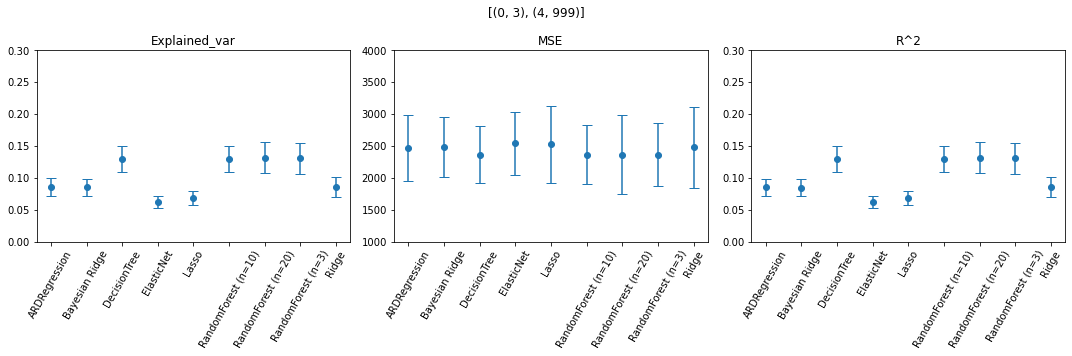

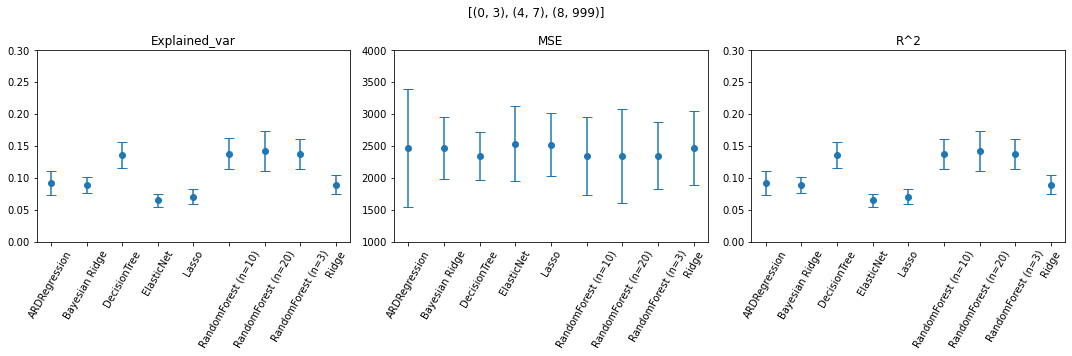

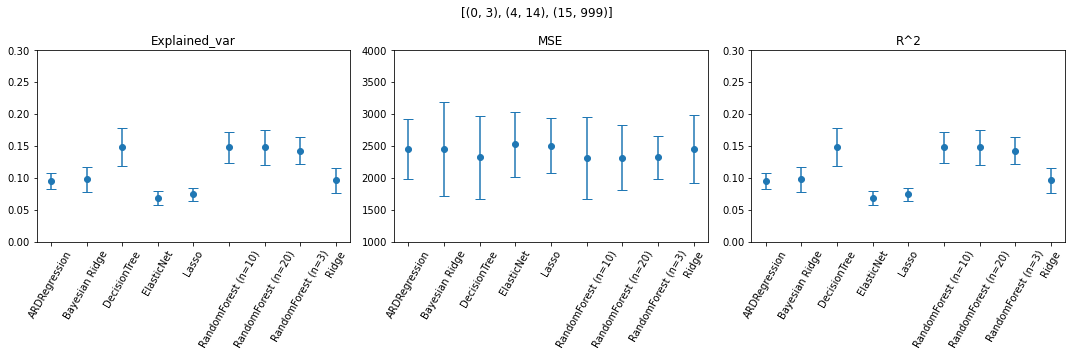

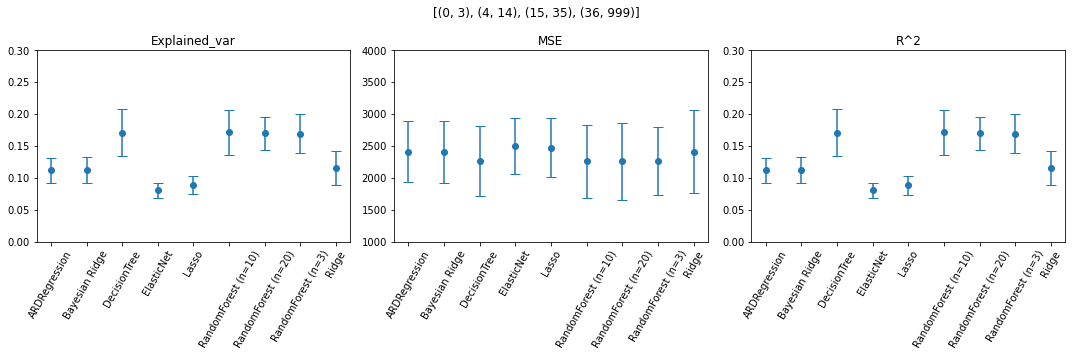

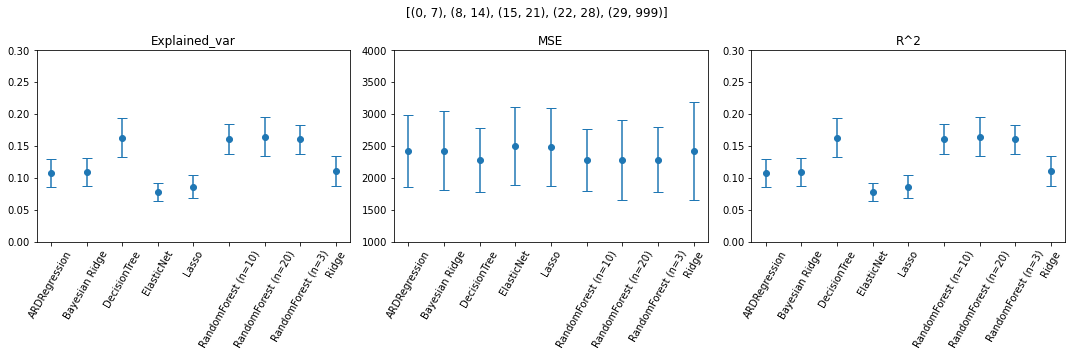

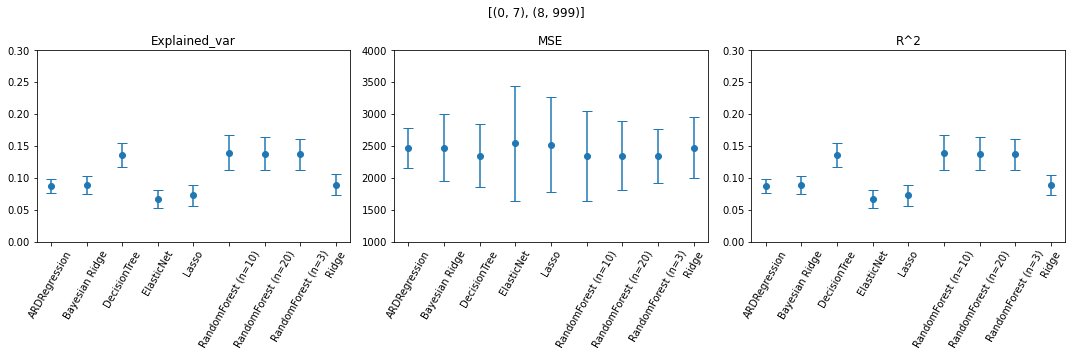

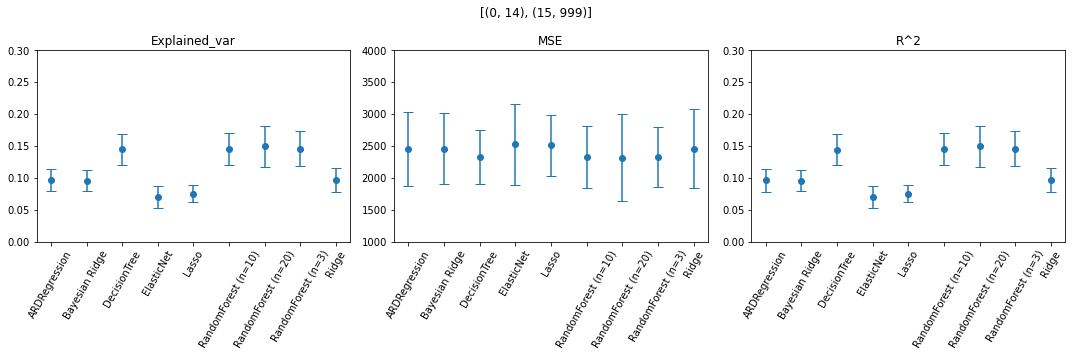

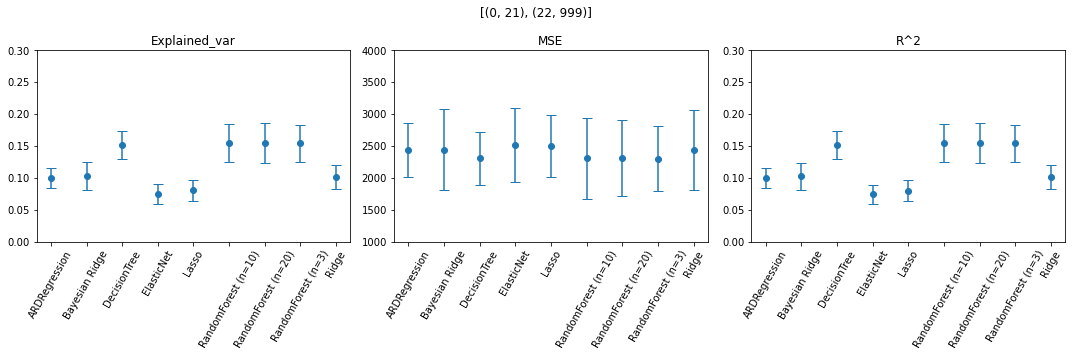

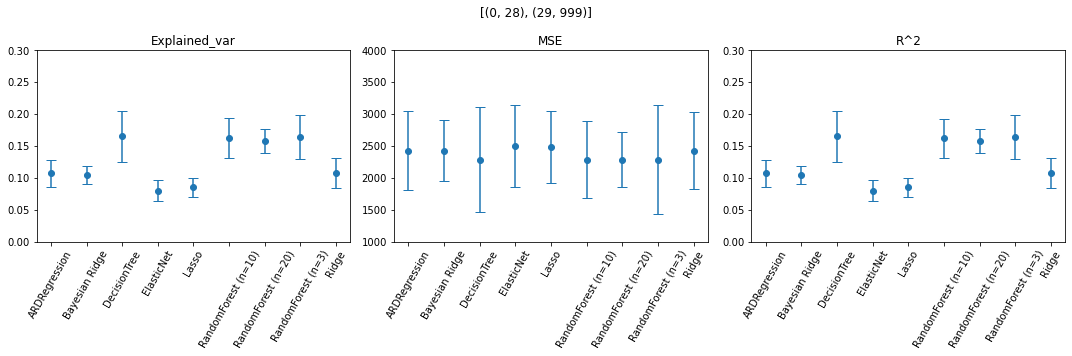

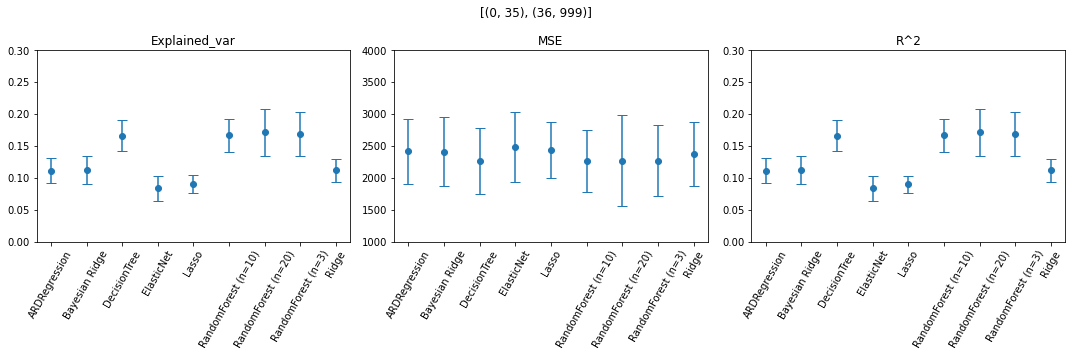

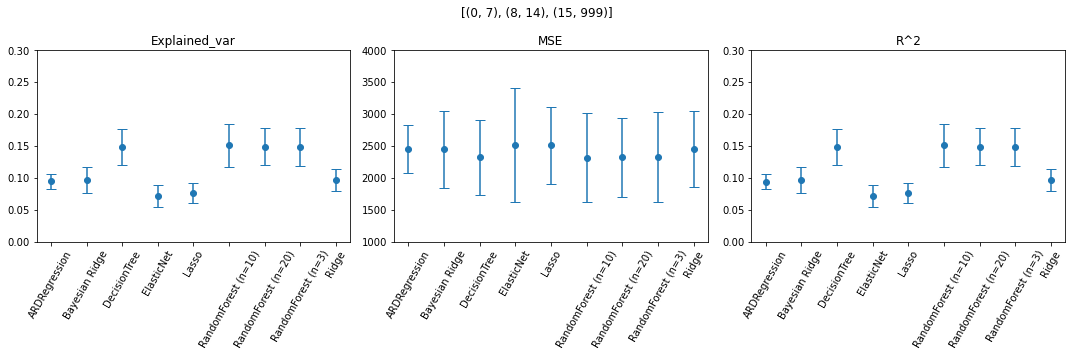

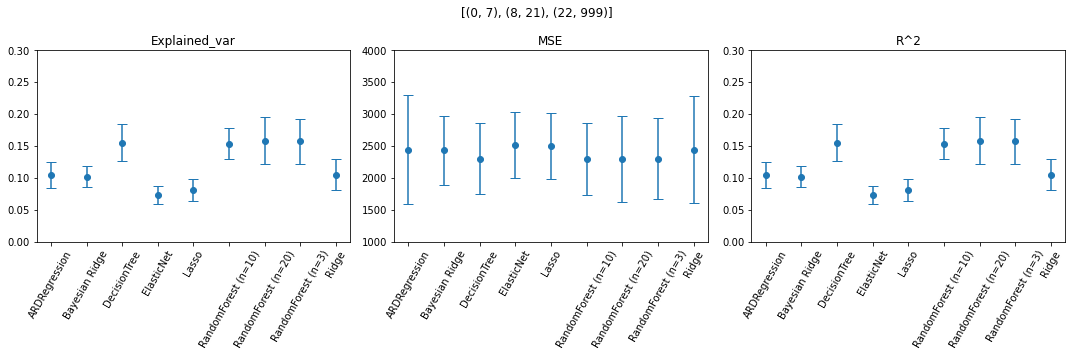

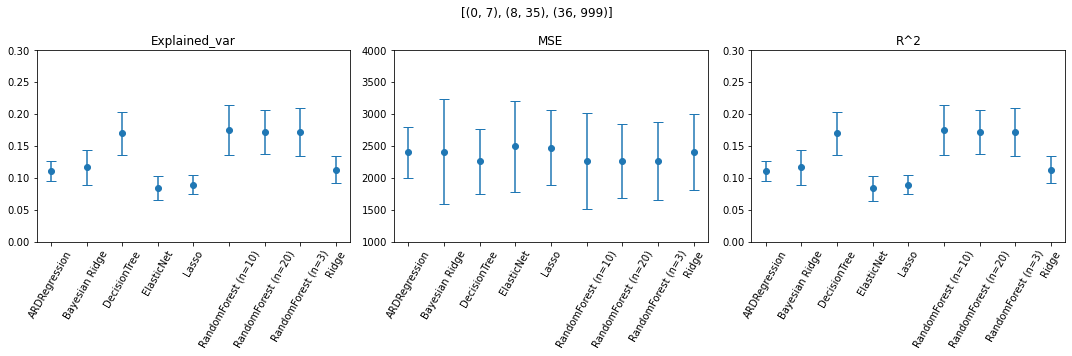

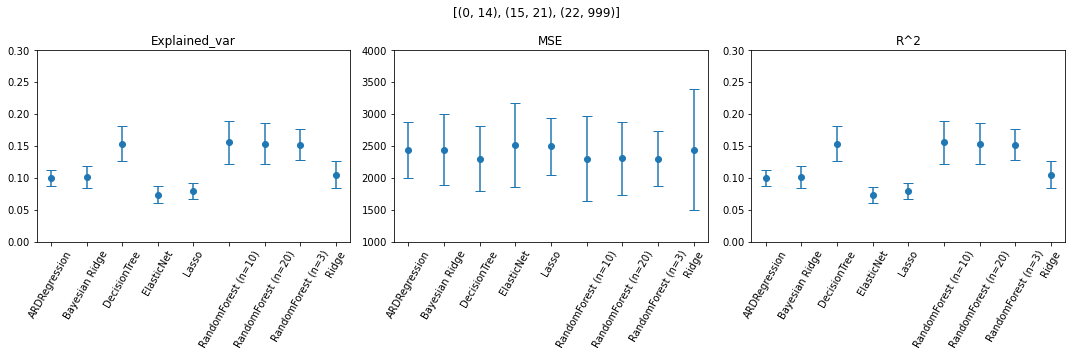

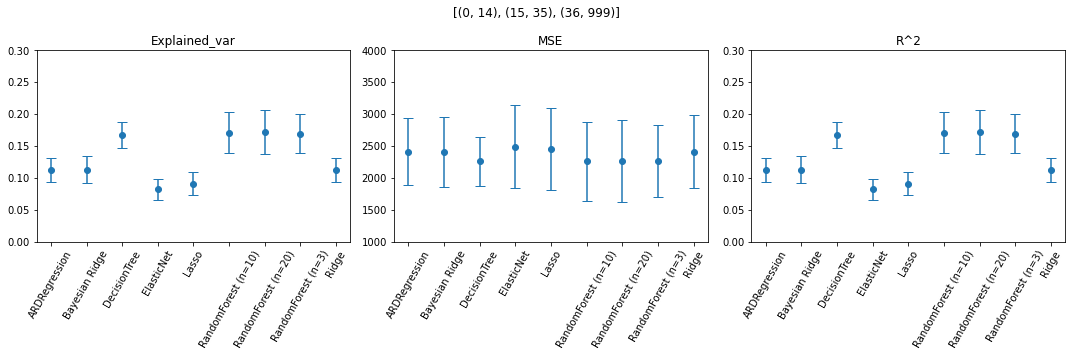

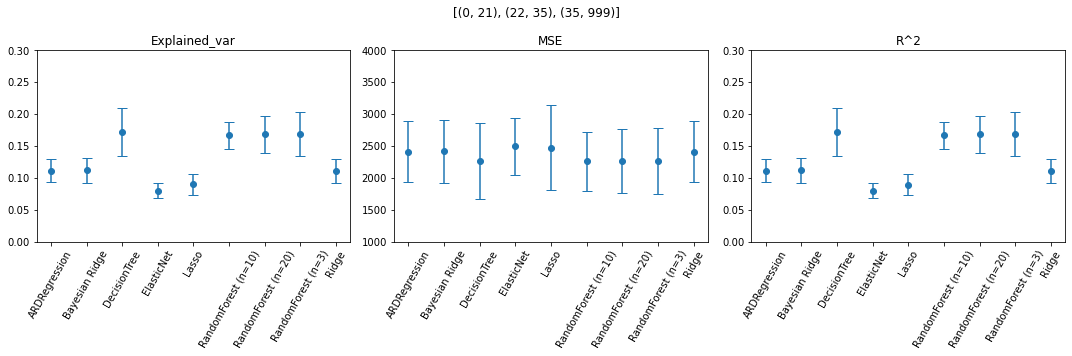

In [153]:

for bin_id in bins:
  fig, ax = plt.subplots(ncols=3, figsize=[15, 5])
  plt.suptitle(bins_dict[int(bin_id)])
  for i, score in enumerate(scores):
    ax[i].set_title(score)
    ax[i].scatter(x=df.loc[(bin_id), (score)].index,
            y=df.loc[(bin_id), (score)]['avg'],
           )
    ax[i].errorbar(x=df.loc[(bin_id), (score)].index,
                y=df.loc[(bin_id), (score)]['avg'],
                yerr=df.loc[(bin_id), (score)]['std'],
                linestyle='None',
                capsize=5)
    ax[i].tick_params(axis='x', rotation=60)
    
  ax[0].set_ylim([0, 0.3])
  ax[1].set_ylim([1000, 4000])
  ax[2].set_ylim([0, 0.3])
  fig.tight_layout()

Best performing models appear to be decision tree and random forest

For each random forest model, plot against bin id

In [200]:
df_unstacked = df.unstack()

In [201]:
df_unstacked

metric Explained_var                                                   \
score            avg                                                    
models ARDRegression Bayesian Ridge DecisionTree ElasticNet     Lasso   
bin id                                                                  
1           0.087289       0.088914     0.135785   0.066598  0.072452   
10           0.11197       0.112585     0.167106   0.082289  0.090928   
11          0.111238       0.111512     0.171764   0.079548  0.089449   
12          0.084969       0.084728     0.129144   0.061724   0.06851   
13           0.09221        0.08834     0.135439   0.064432  0.070353   
14          0.094348       0.097457     0.148291   0.068122  0.074168   
15          0.111533       0.112592     0.170876   0.080325  0.088419   
16           0.10803       0.108944     0.162884   0.077992  0.086151   
2           0.096028       0.095531     0.144351   0.070125  0.075021   
3           0.099726       0.102261      0.15105   0.074007  0.080042   
4            0.10676       0.104812     0.165203   0.079637   0.08514   
5           0.111069       0.112022     0.166088   0.083388  0.089577   
6           0.094168       0.096825     0.148324   0.071649  0.076125   
7           0.104231       0.101545     0.155023   0.073002  0.080428   
8           0.110883       0.116423     0.169702   0.083869  0.089403   
9           0.099714       0.101127      0.15336   0.073369  0.079166   

metric                                                                       \
score                                                                         
models RandomForest (n=10) RandomForest (n=20) RandomForest (n=3)     Ridge   
bin id                                                                        
1                 0.139574            0.137739           0.136663  0.088941   
10                0.170502            0.171767           0.169347  0.112633   
11                0.166641            0.168105           0.168236   0.11113   
12                0.129708            0.131687           0.130308  0.085938   
13                0.137656            0.141565           0.137453  0.089186   
14                0.148046            0.147715            0.14265  0.095972   
15                0.171315            0.169538            0.16929     0.115   
16                 0.16055            0.164181           0.160405  0.110193   
2                 0.145473            0.149198           0.145534  0.096332   
3                 0.154956            0.154454           0.153923  0.101258   
4                 0.161774             0.15821           0.164046  0.107761   
5                 0.166678            0.171253           0.168388  0.112033   
6                 0.150846            0.148614           0.148292  0.096134   
7                 0.153579            0.157964           0.156967  0.105077   
8                 0.174401            0.171209           0.171606  0.112859   
9                 0.155657            0.153603           0.152015  0.104584   

metric                ...       R^2                                            \
score            std  ...       avg           std                               
models ARDRegression  ...     Ridge ARDRegression Bayesian Ridge DecisionTree   
bin id                ...                                                       
1           0.011324  ...  0.088826      0.011306       0.013976     0.019485   
10           0.01924  ...  0.112437      0.019249       0.020841     0.020648   
11          0.017852  ...  0.111066      0.017709       0.020078     0.037403   
12          0.013965  ...  0.085883      0.013909       0.013188     0.019993   
13          0.018488  ...  0.089087        0.0185       0.012791     0.020771   
14          0.012553  ...  0.095926      0.012559       0.019254     0.030251   
15          0.019152  ...  0.114924      0.019166       0.020682     0.036505   
16          0.022013  ...  0.110071      0.021997       0.022493   

In [209]:
 df_unstacked.loc[:, (slice(None), slice(None), "DecisionTree")]['R^2', 'std']["DecisionTree"]

bin id
1     0.019485
10    0.020648
11    0.037403
12    0.019993
13    0.020771
14    0.030251
15    0.036505
16    0.030449
2     0.023753
3     0.021587
4     0.039813
5     0.024591
6     0.028572
7       0.0287
8      0.03394
9     0.027423
Name: DecisionTree, dtype: object

In [215]:
model = "DecisionTree"
best_dt = df_unstacked.loc[:, (slice(None), slice(None), "DecisionTree")]['R^2', 'avg']["DecisionTree"].sort_values(ascending=False)
best_rf3 = df_unstacked.loc[:, 
            (slice(None), slice(None), "RandomForest (n=3)")]['R^2', 'avg']["RandomForest (n=3)"].sort_values(ascending=False)

best_rf10 = df_unstacked.loc[:,
            (slice(None), slice(None), "RandomForest (n=10)")]['R^2', 'avg']["RandomForest (n=10)"].sort_values(ascending=False)

best_rf20 = df_unstacked.loc[:,
            (slice(None), slice(None), "RandomForest (n=20)")]['R^2', 'avg']["RandomForest (n=20)"].sort_values(ascending=False)

In [216]:
best_dt

bin id
11    0.171697
15    0.170775
8     0.169621
10    0.167076
5     0.165993
4     0.165102
16    0.162783
7      0.15484
9     0.153309
3     0.150999
6      0.14826
14    0.148205
2     0.144294
1     0.135699
13    0.135401
12     0.12905
Name: DecisionTree, dtype: object

In [217]:
best_rf3

bin id
8     0.171524
10    0.169322
15    0.169201
5     0.168373
11    0.168156
4        0.164
16     0.16027
7     0.156901
3     0.153881
9     0.151975
6     0.148252
2     0.145511
14    0.142603
13    0.137415
1     0.136611
12    0.130241
Name: RandomForest (n=3), dtype: object

In [218]:
best_rf10

bin id
8     0.174337
15    0.171238
10    0.170405
5     0.166623
11    0.166553
4     0.161722
16    0.160457
9     0.155569
3     0.154915
7     0.153457
6     0.150779
14    0.147991
2     0.145352
1     0.139507
13    0.137585
12    0.129667
Name: RandomForest (n=10), dtype: object

In [219]:
best_rf20

bin id
10    0.171721
5     0.171208
8     0.171144
15    0.169456
11    0.168017
16    0.164089
4      0.15817
7     0.157864
3     0.154404
9     0.153536
2     0.149152
6     0.148508
14    0.147654
13    0.141499
1     0.137688
12    0.131636
Name: RandomForest (n=20), dtype: object

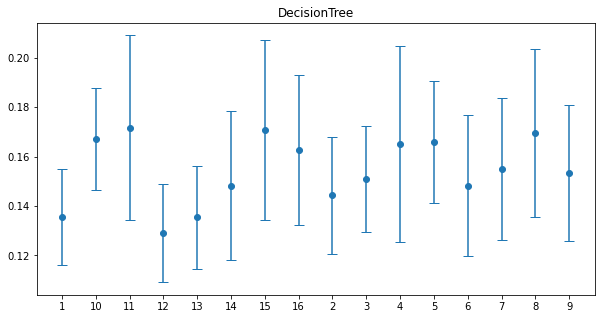

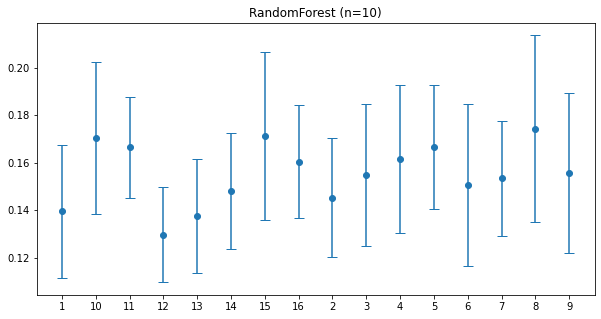

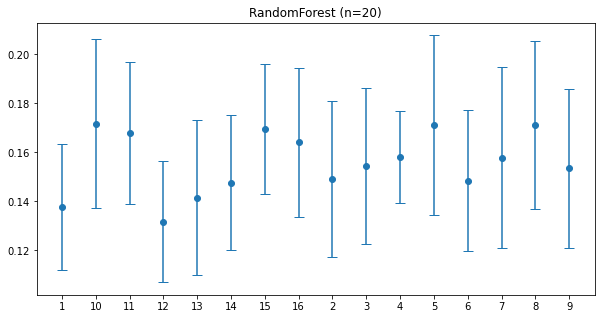

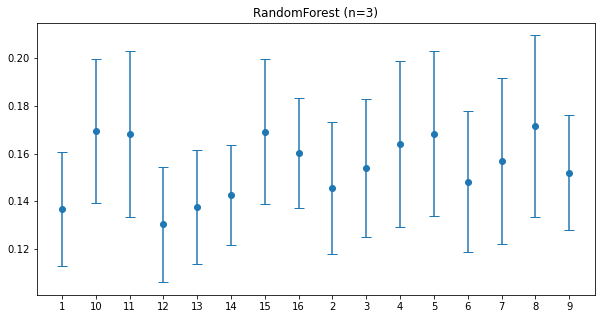

In [195]:
random_forests = ["DecisionTree", 'RandomForest (n=10)', 'RandomForest (n=20)',
       'RandomForest (n=3)']

for model in random_forests:
  
  fig, ax = plt.subplots(figsize=[10, 5])
  ax.scatter(x=df_unstacked.loc[:, (slice(None), slice(None), model)].index,
             y=df_unstacked.loc[:, (slice(None), slice(None), model)]['R^2', 'avg'])
  
  ax.errorbar(x=df_unstacked.loc[:, (slice(None), slice(None), model)].index,
              y=df_unstacked.loc[:, (slice(None), slice(None), model)]['R^2', 'avg'][model],
              yerr=df_unstacked.loc[:, (slice(None), slice(None), model)]['R^2', 'std'][model],
              linestyle='None',
              capsize=5)
  ax.set_title(model)

Best bins: 
10, 11, 15, 5, 8